In [1]:
from matplotlib import pylab as plt
import lsst.daf.persistence as dp
import lsst.afw.display as displ
import lsst.afw.display.rgb as rgb
import lsst.geom as geom
from astropy.io import fits
import numpy as np
import os, glob
from astropy.table import Table

In [2]:
repo = "/sps/lsst/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/rerun/run2.2i-coadd-wfd-dr6-v1"
butler = dp.Butler(repo)
skyMap = butler.get("deepCoadd_skyMap")
gal = Table.read("/sps/lsst/users/namourou/web/desc/clusters/DC2_mask/galaxies.fits")

/tmp/ipykernel_16949/1067056718.py:2: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dp.Butler(repo)
/tmp/ipykernel_16949/1067056718.py:2: FutureWarning: Gen2 Butler has been deprecated (ImsimMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = dp.Butler(repo)


CameraMapper INFO: Loading exposure registry from /sps/lsst/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/registry.sqlite3
CameraMapper INFO: Loading calib registry from /sps/lsst/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading calib registry from /sps/lsst/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading calib registry from /sps/lsst/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/CALIB/calibRegistry.sqlite3
LsstCamMapper WARN: Unable to find valid calib root directory
CameraMapper INFO: Loading calib registry from /sps/lsst/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading exposure registry from /sps/lsst/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/registry.sqlite3
CameraMapper INFO: Loading calib registry from /sps/lsst/dataproducts/desc/DC2/Run2.2i/v19.0.0-v1/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading calib registry from /sps/lsst/dataproducts/de

In [3]:
ra = 60.25
dec = -36.20
point = geom.SpherePoint(ra*geom.degrees, dec*geom.degrees)
tp = skyMap.findTractPatchList([point])

In [4]:
tractInfo = tp[0][0]
tract = tp[0][0].getId()
patch = tp[0][1][0].getIndex()
print(tract, patch)

3830 (3, 4)


In [5]:
wcs = tractInfo.getWcs()
patchInfo = tractInfo.getPatchInfo(patch)
outerBbox = patchInfo.getOuterBBox()

In [6]:
print(outerBbox.beginX, outerBbox.endX)

11900 16100


In [7]:
patchName = str(patch[0]) + ',' + str(patch[1])
print(tract, patchName)
dataId = {'tract':tract, 'patch':patchName}
bandpass_color_map = {'green':'r', 'red':'i', 'blue':'g'}
exposures = {}
for bandpass in bandpass_color_map.values():
    dataId['filter'] = bandpass
    exposures[bandpass] = butler.get('deepCoadd', dataId=dataId)

3830 3,4


In [8]:
mask = exposures["r"].getMaskedImage()
maskplane = mask.mask.getMaskPlaneDict()
mask_array = mask.mask.getArray()

In [9]:
def density(ra_l, dec_l, ra_arr, dec_arr, cote_carre):#Améliorer après test : on peut se passer de deux des arguments
    ra_min, ra_max = min(ra_arr), max(ra_arr)
    dec_min, dec_max = min(dec_arr), max(dec_arr)
    ra_bins = np.arange(ra_min, ra_max, cote_carre)
    dec_bins = np.arange(dec_min, dec_max, cote_carre)
    density = np.histogram2d(ra_l, dec_l, bins = (ra_bins,dec_bins))[0]
    ra_pt = []
    for i in range(len(ra_bins)-1):
        ra_pt.append((ra_bins[i]+ra_bins[i+1])/2) 
    dec_pt = []
    for i in range(len(dec_bins)-1):
        dec_pt.append((dec_bins[i]+dec_bins[i+1])/2)
    ra_pt_grid, dec_pt_grid = np.meshgrid(ra_pt, dec_pt)
    return density, ra_pt_grid, dec_pt_grid

def mask(density, ra_grid, dec_grid, cdt):
    mu = np.mean(density)
    sigma = np.std(density)
    if cdt[0]=='inf':
        index = np.where(density.T < cdt[1])
    if cdt[0]=='sup':
        index = np.where(density.T > cdt[1])
    ra_mask = ra_grid[index]
    dec_mask = dec_grid[index]
    return ra_mask, dec_mask #Coord of center of square

In [10]:
ra = np.linspace(60.16009785910134, 60.449335167242914, len(mask_array))
dec = np.linspace(-36.34058270206721, -36.10725378316265, len(mask_array))
#ra_m, dec_m = np.meshgrid(ra, dec)

In [11]:
gal = gal[(gal["ra"]<=max(ra))*(gal["ra"]>=min(ra))*(gal["dec"]<=max(dec))*(gal["dec"]>=min(dec))]

In [12]:
ra_m, dec_m = np.meshgrid(ra,dec)

In [27]:
ra_grid2

array([[60.16509786, 60.17509786, 60.18509786, 60.19509786, 60.20509786,
        60.21509786, 60.22509786, 60.23509786, 60.24509786, 60.25509786,
        60.26509786, 60.27509786, 60.28509786, 60.29509786, 60.30509786,
        60.31509786, 60.32509786, 60.33509786, 60.34509786, 60.35509786,
        60.36509786, 60.37509786, 60.38509786, 60.39509786, 60.40509786,
        60.41509786, 60.42509786, 60.43509786],
       [60.16509786, 60.17509786, 60.18509786, 60.19509786, 60.20509786,
        60.21509786, 60.22509786, 60.23509786, 60.24509786, 60.25509786,
        60.26509786, 60.27509786, 60.28509786, 60.29509786, 60.30509786,
        60.31509786, 60.32509786, 60.33509786, 60.34509786, 60.35509786,
        60.36509786, 60.37509786, 60.38509786, 60.39509786, 60.40509786,
        60.41509786, 60.42509786, 60.43509786],
       [60.16509786, 60.17509786, 60.18509786, 60.19509786, 60.20509786,
        60.21509786, 60.22509786, 60.23509786, 60.24509786, 60.25509786,
        60.26509786, 60.2750

In [ ]:
plt.scatter(ra_m, dec_m, c=mask_array)

Error in callback <function flush_figures at 0x7fc344adaa60> (for post_execute):


In [15]:
flat_m = DETECTED.ravel()

In [34]:
ra_m_gal, dec_m_gal= np.meshgrid(np.array(gal['ra']), np.array(gal['dec']))

In [63]:
gal[(gal['ra']>ra_m2[25]-0.5*0.01)&(gal['ra']<ra_m2[25]+0.5*0.01)&(gal['dec']<dec_m2[25]+0.5*0.01)&(gal['dec']>dec_m2[25]-0.5*0.01)]

id,ra,dec,redshift,mag_g,mag_r,mag_i,mag_z,mag_y,zmode [1],photoz_pdf [301],match,clean,good,extend
int64,float64,float64,float32,float64,float64,float64,float64,float64,float64,float64,bool,bool,bool,float64
16844947634295463,60.2415286530901,-36.18385570617028,0.36550865,21.882215449473662,19.92262163787435,19.606643557126283,18.928925885093538,18.470971926169153,0.36,0.0 .. 0.0,False,True,True,1.0
16844947634295464,60.24559151571889,-36.18455120790577,1.0550866,22.702480624452235,22.646973609278945,22.515440100667917,21.677630287669338,21.928985430877603,1.11,0.0 .. 0.0,True,True,True,1.0
16844947634295497,60.24194458450885,-36.18562057100126,0.88717157,24.838260392223923,24.1450377957468,23.948955751504798,23.17276472321682,22.423313747316698,1.23,0.0 .. 0.0,True,True,True,1.0
16844947634295516,60.24016949511181,-36.18904763885169,0.605616,19.31681009692127,18.56241669426972,18.270044849168073,17.84367234715988,17.327675352848093,0.43,0.0 .. 0.0,False,True,True,1.0


In [64]:
np.where(cols_scaled==60.2415286530901)

(array([], dtype=int64),)

In [65]:
cols_scaled[0]

60.44293062684835

In [87]:
cols_scaled_r = np.round(cols_scaled, 4)

In [88]:
np.where(cols_scaled_r==round(60.2415286530901,4))

(array([ 133843,  134461,  135082,  135694,  136307,  136916,  137499,
         138065,  138607,  139115,  139606,  140098,  140597,  141100,
         154255,  154827,  155417,  156030,  156676,  157338,  158021,
         158715,  159423,  160145,  160868,  175042,  175510,  175996,
         176493,  177003,  177527,  178603,  391342,  391855,  392350,
         392823,  393274,  393719,  394166,  394598,  395015,  395421,
         395817,  396208,  396589,  396959,  397322,  397704,  398120,
         398551,  399003,  399466,  399924,  400362,  478555,  478998,
         479443,  479881,  480313,  480749,  481175,  481587,  482001,
         482424,  650149,  650617,  651109,  651620,  652135,  652658,
         653197,  653763,  654340,  654930,  655522,  656107,  656695,
         657277,  657862,  658438,  659013,  659596,  660167,  660733,
         661288,  661842,  662391,  662941,  663511,  745397,  745968,
         746513,  747058,  747589,  748119,  748656,  749203,  749776,
      

In [55]:
gal_ra_mask = [gal['ra'][i] in cols_scaled for i in range(len(gal['ra']))]

In [56]:
gal["ra"][gal_ra_mask]

<Column name='ra' dtype='float64' length=0>

In [61]:
np.where(gal_ra_mask==True)

(array([], dtype=int64),)

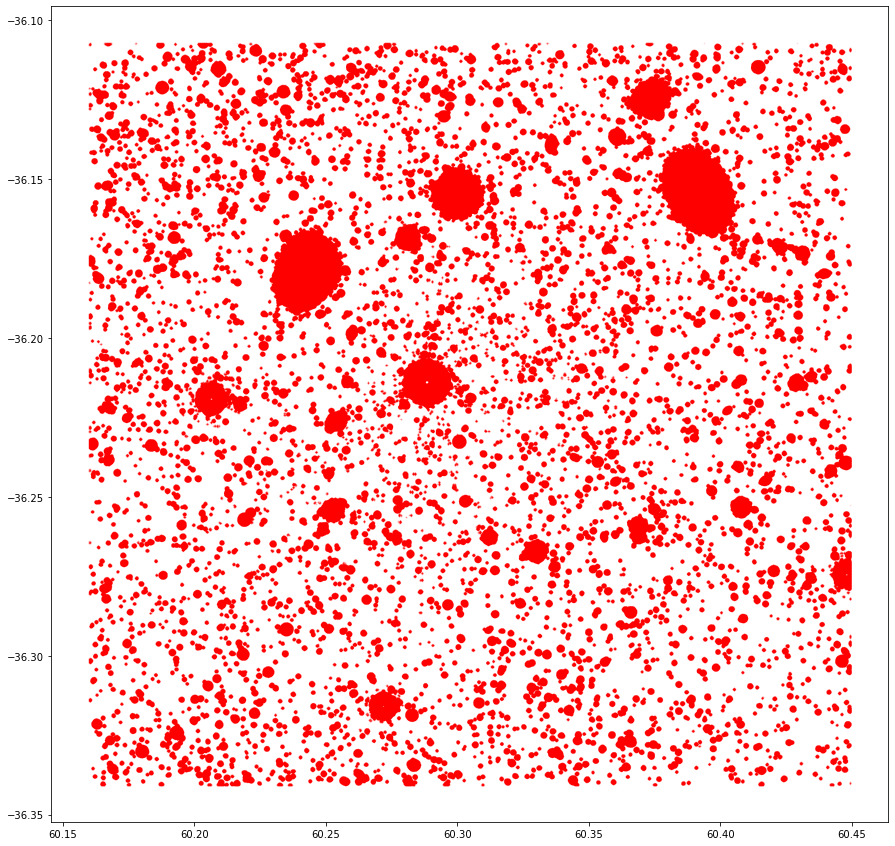

In [45]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(cols_scaled, rows_scaled, s=.5, alpha = .1, color = 'red')

In [43]:
len(cols_scaled)

2571417

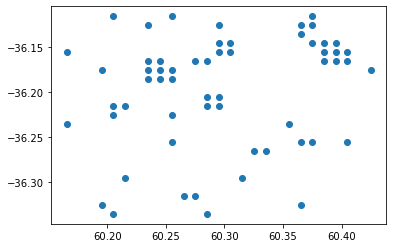

In [40]:
plt.scatter(ra_m2, dec_m2)

In [18]:
[DETECTED==32]

[array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]])]

In [12]:
dens1, ra_grid1, dec_grid1 = density(gal['ra'], gal['dec'], ra, dec, 0.01)

In [13]:
mu1 = np.mean(dens1)
sigma1 = np.std(dens1)
print(mu1,sigma1)
ra_m1, dec_m1 = mask(dens1, ra_grid1, dec_grid1, ["inf", mu1-2.5*sigma1])

19.6444099378882 5.467800986977595


In [14]:
DETECTED = np.bitwise_and(mask_array, 1<<5)

In [21]:
dx = (ra[1]-ra[0])/2.
dy = (dec[1]-dec[0])/2.
extent = [ra[0]-dx, ra[-1]+dx, dec[0]-dy, dec[-1]+dy]
extent_i = [0,0,0,0]
extent_i[0], extent_i[1] = extent[1], extent[0]
extent_i[2], extent_i[3] = extent[3], extent[2]

In [22]:
delta_ra = (-60.44933516724291+60.16009785910134)
delta_dec = -(+36.10725378316265-36.34058270206721)
x_rescale = delta_ra/4200
y_rescale = delta_dec/4200

In [23]:
rows, cols = np.where(DETECTED!=0)
cols_scaled = cols * x_rescale + max(ra)
rows_scaled = rows * y_rescale + min(dec)

In [26]:
dens2, ra_grid2, dec_grid2 = density(cols_scaled, rows_scaled, ra, dec, 0.01)

In [39]:
ra_m2, dec_m2 = mask(dens2, ra_grid2, dec_grid2, ["sup", np.mean(dens2)+0.75*np.std(dens2)])

In [20]:
mu2 = np.mean(dens2)
sigma2 = np.std(dens2)
print(mu2,sigma2)

3827.023291925466 3633.7006923393096


(-36.34058270206721, -36.10725378316265)

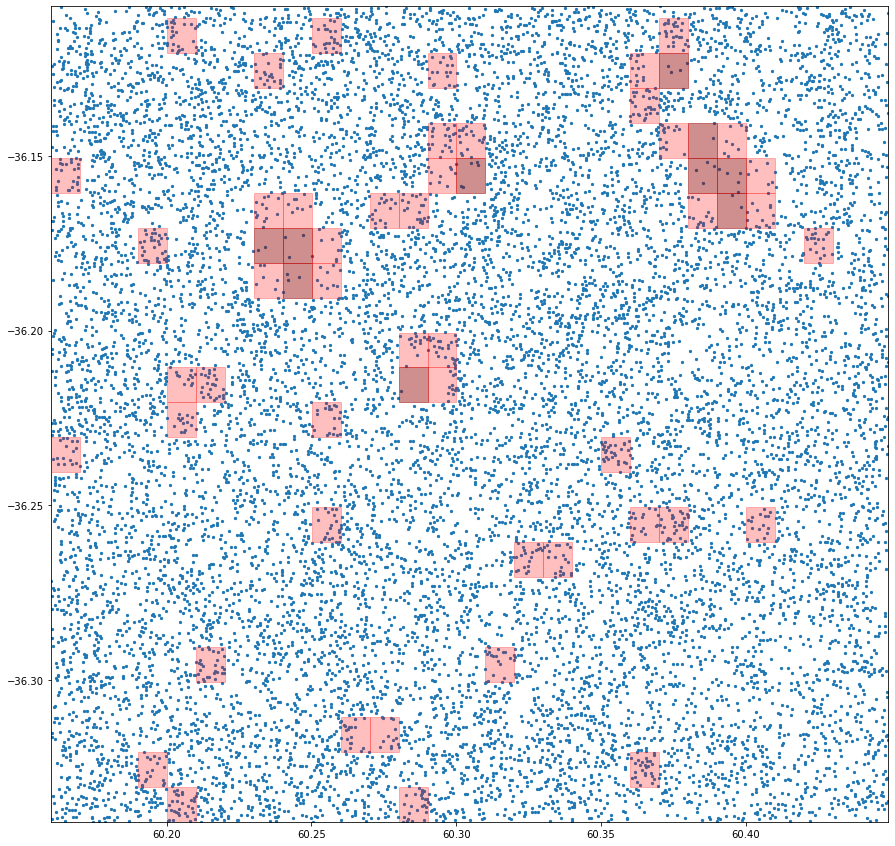

In [21]:
fig, ax = plt.subplots(figsize=(15, 15))
for i in range(len(ra_m1)):
    rectangle = plt.Rectangle((ra_m1[i]-0.5*0.01, dec_m1[i]-0.5*0.01), 0.01, 0.01, fill=True, color='black', alpha = .25,zorder=3)
    ax.add_patch(rectangle)
for i in range(len(ra_m2)):
    rectangle = plt.Rectangle((ra_m2[i]-0.5*0.01, dec_m2[i]-0.5*0.01), 0.01, 0.01, fill=True, color='red', alpha = .25,zorder=3)
    ax.add_patch(rectangle)
plt.scatter(gal['ra'], gal['dec'], s= 5)
plt.xlim([min(ra),max(ra)])
plt.ylim([min(dec),max(dec)])

In [22]:
ra1, dec1 = min(ra), min(dec)
ra2, dec2 = max(ra), max(dec)
area_tot = abs(ra2-ra1)*abs(dec2-dec1)
d_flat1=dens1.ravel()
d_flat2=dens2.ravel()
surface_mask1 = len(ra_m1)*(0.01**2)
surface_mask2 = len(ra_m2)*(0.01**2)
s_frac1 = surface_mask1/area_tot
s_frac2 = surface_mask2/area_tot

Text(0.5, 1.0, 'Distribution of the number of galaxies per bin')

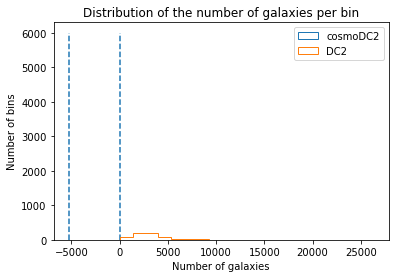

In [23]:
plt.hist(d_flat1, bins = 20, histtype = 'step', label = "cosmoDC2")
plt.vlines(mu1-2.5*sigma1,0,6000, linestyle = '--')
plt.hist(d_flat2, bins = 20, histtype = 'step', label = "DC2")
plt.vlines(mu2-2.5*sigma2,0,6000, linestyle = '--')
plt.legend()
plt.ylabel("Number of bins")
plt.xlabel("Number of galaxies")
plt.title("Distribution of the number of galaxies per bin")

In [24]:
masked_gals_t1 = []
masked_gals_t2 = []
#masked_halos1 = []
#masked_clusters1 = []
for i in range(len(ra_m1)):
    ra_min = ra_m1[i]-0.5*0.01
    ra_max = ra_m1[i]+0.5*0.01
    dec_min = dec_m1[i]-0.5*0.01
    dec_max = dec_m1[i]+0.5*0.01
    masked_gals1 = gal[(gal['ra'] >= ra_min) & (gal['ra'] <= ra_max) & \
                    (gal['dec'] >= dec_min) & (gal['dec'] <= dec_max)]
    #masked_halos = halos_cdc[(halos_cdc['ra_cl'] >= ra_min) & (halos_cdc['ra_cl'] <= ra_max) & \
    #                (halos_cdc['dec_cl'] >= dec_min) & (halos_cdc['dec_cl'] <= dec_max)]
    #masked_clusters = clusters_cdc[(clusters_cdc['Xphys'] >= ra_min) & (clusters_cdc['Xphys'] <= ra_max) & \
    #                (clusters_cdc['Yphys'] >= dec_min) & (clusters_cdc['Yphys'] <= dec_max)]
    masked_gals_t1.append(len(masked_gals1))
    #masked_halos_cdc.append(len(masked_halos))
    #masked_clusters_cdc.append(len(masked_clusters))
for i in range(len(ra_m2)):
    ra_min = ra_m2[i]-0.5*0.01
    ra_max = ra_m2[i]+0.5*0.01
    dec_min = dec_m2[i]-0.5*0.01
    dec_max = dec_m2[i]+0.5*0.01
    masked_gals2 = gal[(gal['ra'] >= ra_min) & (gal['ra'] <= ra_max) & \
                    (gal['dec'] >= dec_min) & (gal['dec'] <= dec_max)]
    masked_gals_t2.append(len(masked_gals2))

In [25]:
n_gal_frac1 = sum(masked_gals_t1)/len(gal)
n_gal_frac2 = sum(masked_gals_t2)/len(gal)
#n_halo_frac_cdc = sum(masked_halos_cdc)/len(halos_cdc)
#n_halo_frac_dc = sum(masked_halos_dc)/len(halos_dc)
#n_clusters_frac_cdc = sum(masked_clusters_cdc)/len(clusters_cdc)
#n_clusters_frac_dc = sum(masked_clusters_dc)/len(clusters_dc)

In [26]:
sumary = {"cat_name" : ["density", "maskplane"], "masked surface (deg²)" : [round(surface_mask1,3), round(surface_mask2,2)], "fraction of surface masked" : [round(s_frac1,4), round(s_frac2,4)]
          ,"n_masked_gals" : [sum(masked_gals_t1), sum(masked_gals_t2)], "frac_masked_gals" : [round(n_gal_frac1,4), round(n_gal_frac2,4)]}#,
         #"n_masked_halos" : [sum(masked_halos_cdc),sum(masked_halos_dc)], "frac_masked_halos" : [round(n_halo_frac_cdc,4), round(n_halo_frac_dc,4)],
         #"n_masked_clusters" : [sum(masked_clusters_cdc),sum(masked_clusters_dc)], "frac_masked_clusters" : [round(n_clusters_frac_cdc,4), round(n_clusters_frac_dc,4)]}

In [27]:
sumary = Table(sumary)
display(sumary)

cat_name,masked surface (deg²),fraction of surface masked,n_masked_gals,frac_masked_gals
str9,float64,float64,int64,float64
density,0.001,0.0148,32,0.0024
maskplane,0.01,0.0859,910,0.0687


## Second iteration (in development)

Test for one mask bit

In [105]:
ra_m_test[25]

60.24509785910132

In [112]:
ra_m_min, ra_m_max = ra_m_test[25]-0.5*0.01, ra_m_test[25]+0.5*0.01
dec_m_min, dec_m_max = dec_m_test[25]-0.5*0.01, dec_m_test[25]+0.5*0.01
cols_scaled_25 = cols_scaled[np.where((cols_scaled<ra_m_max)&(cols_scaled>ra_m_min)&(rows_scaled<dec_m_max)&(rows_scaled>dec_m_min))]
rows_scaled_25 = rows_scaled[np.where((cols_scaled<ra_m_max)&(cols_scaled>ra_m_min)&(rows_scaled<dec_m_max)&(rows_scaled>dec_m_min))]

(-36.34058270206721, -36.10725378316265)

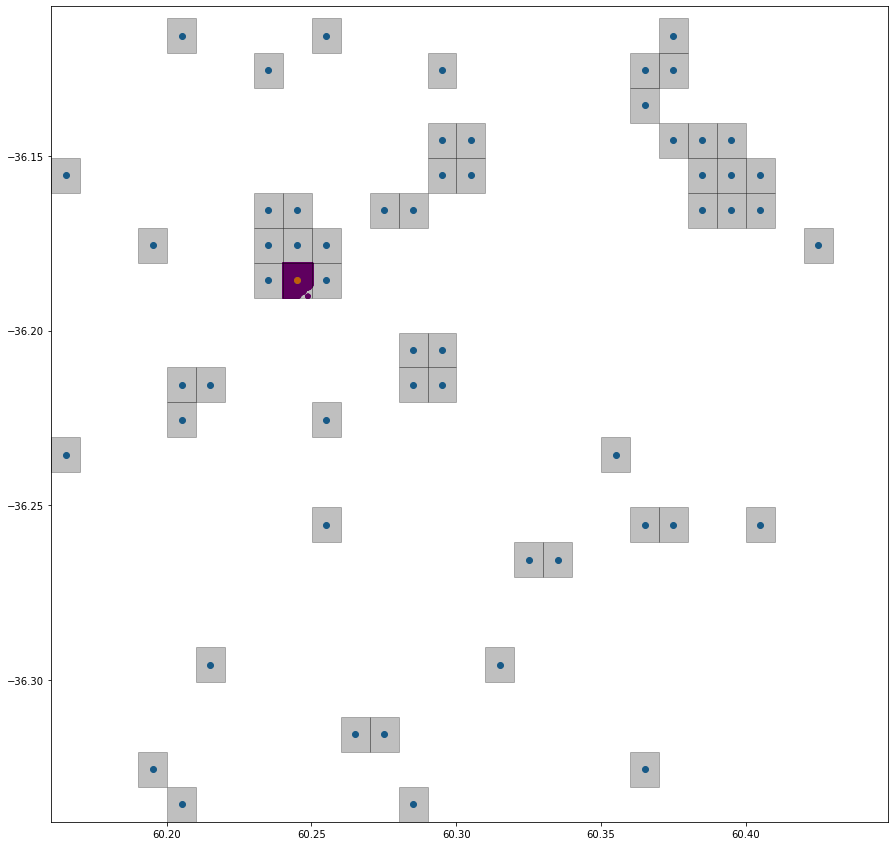

In [113]:
fig, ax = plt.subplots(figsize=(15, 15))
for i in range(len(ra_m_test)):
    rectangle = plt.Rectangle((ra_m_test[i]-0.5*0.01, dec_m_test[i]-0.5*0.01), 0.01, 0.01, fill=True, color='black', alpha = .25,zorder=3)
    ax.add_patch(rectangle)
plt.scatter(cols_scaled_25,rows_scaled_25,s=1, color = 'purple')
plt.scatter(ra_m_test, dec_m_test)
plt.scatter(ra_m_test[25],dec_m_test[25])
plt.xlim([min(ra),max(ra)])
plt.ylim([min(dec),max(dec)])

In [136]:
dens_testit2, ra_grid_testit2, dec_grid_testit2 = density(cols_scaled_25, rows_scaled_25, ra, dec, 0.01/20)

In [137]:
#len(dens_testit2)
#ra_grid_testit2

In [138]:
ra_m_testit2, dec_m_testit2 = mask(dens_testit2, ra_grid_testit2, dec_grid_testit2, ["sup", np.mean(dens_testit2)])

In [139]:
len(ra_m_testit2)

377

(-36.19083270206724, -36.18033270206723)

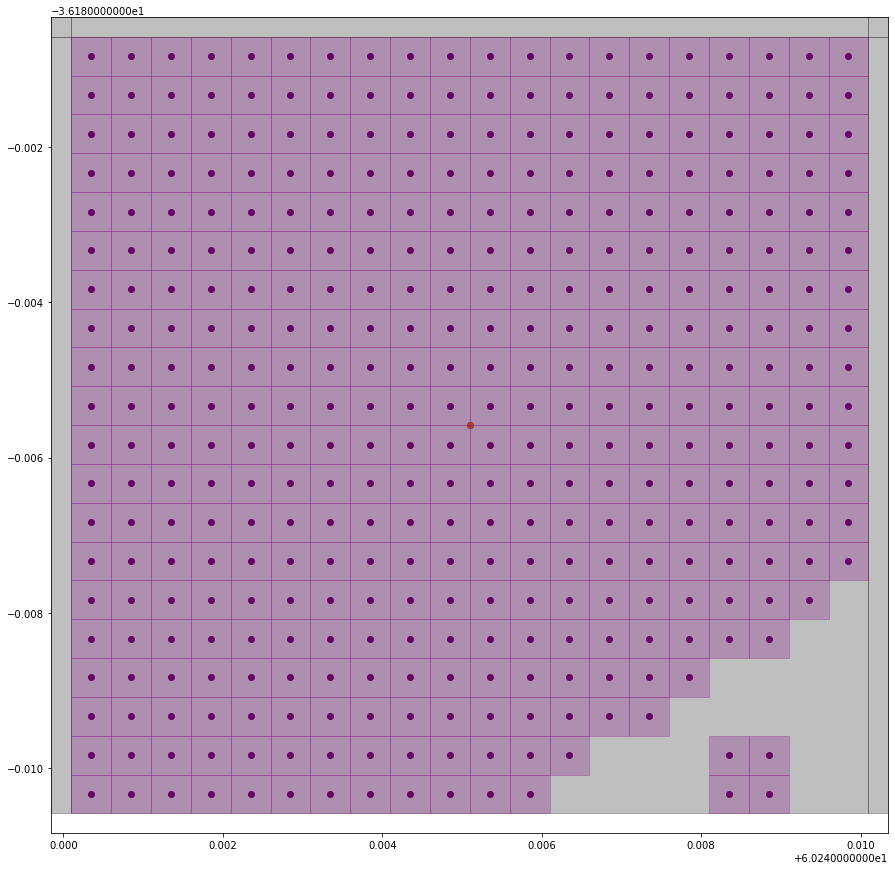

In [161]:
fig, ax = plt.subplots(figsize=(15, 15))
for i in range(len(ra_m_test)):
    rectangle = plt.Rectangle((ra_m_test[i]-0.5*0.01, dec_m_test[i]-0.5*0.01), 0.01, 0.01, fill=True, color='black', alpha = .25,zorder=3)
    ax.add_patch(rectangle)
for i in range(len(ra_m_testit2)):
    rectangle = plt.Rectangle((ra_m_testit2[i]-0.5*0.01/20, dec_m_testit2[i]-0.5*0.01/20), 0.01/20, 0.01/20, fill=True, color='purple', alpha = .25,zorder=3)
    ax.add_patch(rectangle)
plt.scatter(ra_m_test, dec_m_test)
plt.scatter(ra_m_test[25],dec_m_test[25])
plt.scatter(ra_m_testit2, dec_m_testit2, color = 'purple')
plt.xlim([ra_m_min-0.5*0.0005,ra_m_max+0.5*0.0005])
plt.ylim([dec_m_min-0.5*0.0005,dec_m_max+0.5*0.0005])

In [187]:
def region_growing(seed, unvisited, threshold_distance):
    region = [seed]
    queue = [seed]
    while queue:
        current_square = queue.pop(0)
        for neighbor in unvisited[:]:
            distance = ((neighbor[0] - current_square[0]) ** 2 + (neighbor[1] - current_square[1]) ** 2) ** 0.5
            if distance <= threshold_distance:
                region.append(neighbor)
                queue.append(neighbor)
                unvisited.remove(neighbor)

    return region

def count_regions(rose_squares_coords, threshold_distance):
    unvisited_squares = rose_squares_coords[:]
    regions = []

    while unvisited_squares:
        seed = unvisited_squares[0]
        region = region_growing(seed, unvisited_squares, threshold_distance)
        regions.append(region)

    return regions

# Supposons que vous ayez une liste de coordonnées pour les carrés roses
rose_squares_coords = list(np.rec.fromarrays([ra_m_testit2, dec_m_testit2]))  # Remplacez cela par vos propres coordonnées

# Définissez la distance seuil pour la croissance de la région
threshold_distance = 0.001  # Choisir la valeur appropriée

# Obtenez les régions de carrés roses
regions = count_regions(rose_squares_coords, threshold_distance)

# Affichez le nombre de carrés roses dans chaque région
max_reg=[]
for i, region in enumerate(regions, start=1): 
    print(f"Nombre de carrés roses dans la région {i} : {len(region)}")
    if len(region)>len(max_reg):
        max_reg = region

Nombre de carrés roses dans la région 1 : 374
Nombre de carrés roses dans la région 2 : 5


In [259]:
ra_nf, dec_nf = map(np.array,zip(*regions[1]))

In [260]:
ra_f, dec_f = map(np.array, zip(*max_reg))

In [261]:
if len(np.where((ra_nf == ra_nf[0])&(dec_nf ==dec_nf[0]))[0])>1:
    ra_nf, dec_nf = np.delete(ra_nf, np.where((ra_nf == ra_nf[0])&(dec_nf ==dec_nf[0]))[0][0]), np.delete(dec_nf, np.where((ra_nf == ra_nf[0])&(dec_nf ==dec_nf[0]))[0][0])
    print(ra_nf, dec_nf)

[60.24834786 60.24884786 60.24834786 60.24884786] [-36.1903327 -36.1903327 -36.1898327 -36.1898327]


In [264]:
if len(np.where((ra_f == ra_f[0])&(dec_f ==dec_f[0]))[0])>1:
    ra_f, dec_f = np.delete(ra_f, np.where((ra_f == ra_f[0])&(dec_f ==dec_f[0]))[0][0]), np.delete(dec_f, np.where((ra_f == ra_f[0])&(dec_f ==dec_f[0]))[0][0])
    print(ra_f, dec_f)

[60.24034786 60.24084786 60.24034786 60.24084786 60.24134786 60.24134786
 60.24034786 60.24084786 60.24134786 60.24184786 60.24184786 60.24184786
 60.24034786 60.24084786 60.24134786 60.24184786 60.24234786 60.24234786
 60.24234786 60.24234786 60.24034786 60.24084786 60.24134786 60.24184786
 60.24234786 60.24284786 60.24284786 60.24284786 60.24284786 60.24284786
 60.24034786 60.24084786 60.24134786 60.24184786 60.24234786 60.24284786
 60.24334786 60.24334786 60.24334786 60.24334786 60.24334786 60.24334786
 60.24034786 60.24084786 60.24134786 60.24184786 60.24234786 60.24284786
 60.24334786 60.24384786 60.24384786 60.24384786 60.24384786 60.24384786
 60.24384786 60.24384786 60.24034786 60.24084786 60.24134786 60.24184786
 60.24234786 60.24284786 60.24334786 60.24384786 60.24434786 60.24434786
 60.24434786 60.24434786 60.24434786 60.24434786 60.24434786 60.24434786
 60.24034786 60.24084786 60.24134786 60.24184786 60.24234786 60.24284786
 60.24334786 60.24384786 60.24434786 60.24484786 60

(-36.19083270206724, -36.18033270206723)

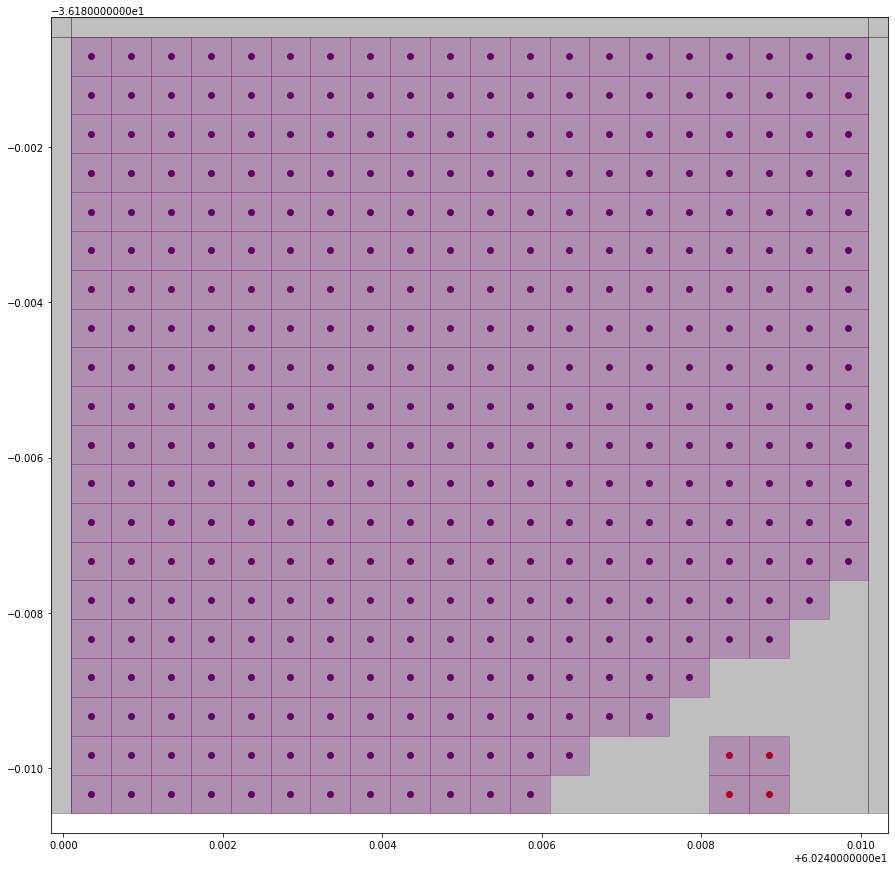

In [266]:
fig, ax = plt.subplots(figsize=(15, 15))
for i in range(len(ra_m_test)):
    rectangle = plt.Rectangle((ra_m_test[i]-0.5*0.01, dec_m_test[i]-0.5*0.01), 0.01, 0.01, fill=True, color='black', alpha = .25,zorder=3)
    ax.add_patch(rectangle)
for i in range(len(ra_m_testit2)):
    rectangle = plt.Rectangle((ra_m_testit2[i]-0.5*0.01/20, dec_m_testit2[i]-0.5*0.01/20), 0.01/20, 0.01/20, fill=True, color='purple', alpha = .25,zorder=3)
    ax.add_patch(rectangle)
#plt.scatter(ra_m_test, dec_m_test)
#plt.scatter(ra_m_test[25],dec_m_test[25])
plt.scatter(ra_nf, dec_nf, color = 'red')
plt.scatter(ra_f, dec_f, color = 'purple')
plt.xlim([ra_m_min-0.5*0.0005,ra_m_max+0.5*0.0005])
plt.ylim([dec_m_min-0.5*0.0005,dec_m_max+0.5*0.0005])

## Inject assertion (at the end of mask making of one region, assemble everybody and look if density > mean density)

(-36.19083270206724, -36.18033270206723)

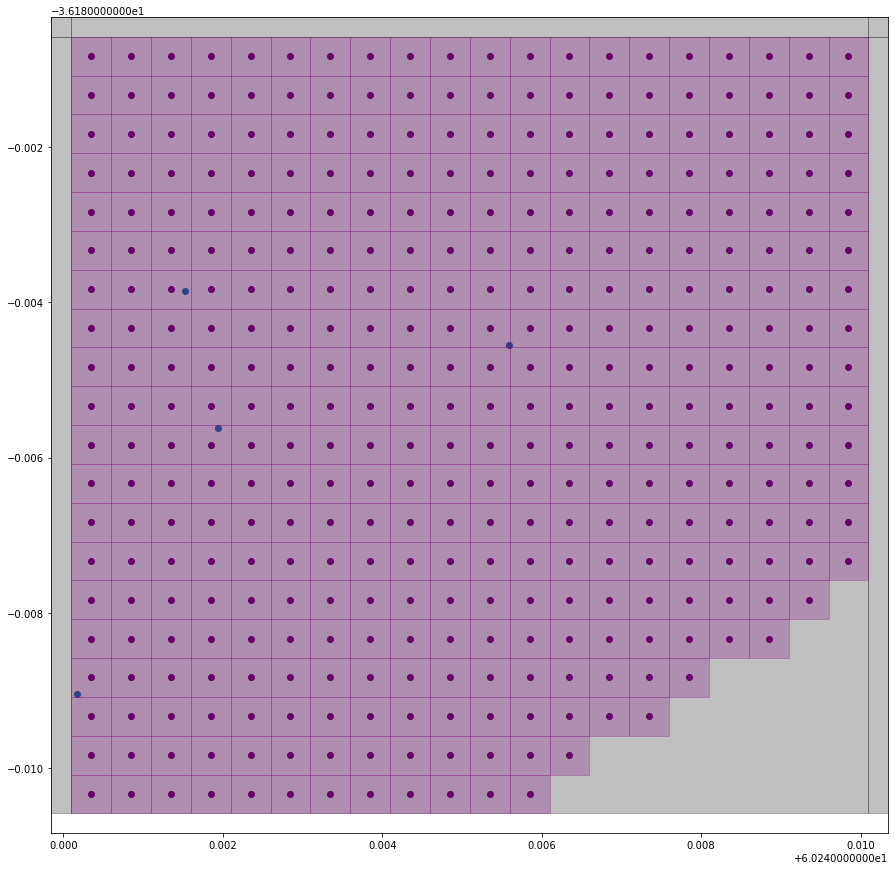

In [267]:
fig, ax = plt.subplots(figsize=(15, 15))
for i in range(len(ra_m_test)):
    rectangle = plt.Rectangle((ra_m_test[i]-0.5*0.01, dec_m_test[i]-0.5*0.01), 0.01, 0.01, fill=True, color='black', alpha = .25,zorder=3)
    ax.add_patch(rectangle)
for i in range(len(ra_f)):
    rectangle = plt.Rectangle((ra_f[i]-0.5*0.01/20, dec_f[i]-0.5*0.01/20), 0.01/20, 0.01/20, fill=True, color='purple', alpha = .25,zorder=3)
    ax.add_patch(rectangle)
plt.scatter(gal['ra'], gal['dec'])#, s=10)
#plt.scatter(ra_m_test, dec_m_test)
#plt.scatter(ra_m_test[25],dec_m_test[25])
#plt.scatter(ra_nf, dec_nf, color = 'red')
plt.scatter(ra_f, dec_f, color = 'purple')
plt.xlim([ra_m_min-0.5*0.0005,ra_m_max+0.5*0.0005])
plt.ylim([dec_m_min-0.5*0.0005,dec_m_max+0.5*0.0005])

In [219]:
testing1[0]

array([  0,   1,   3,   7,  13,  21,  31,  43,  57,  73,  91, 111, 133,
       156, 180, 206, 233, 261, 291, 322, 354])

In [213]:
testing1 = np.where(ra_f == ra_m_testit2[i])
testing2 = np.where(dec_f == dec_m_testit2[i])

In [214]:
testing1, testing2

((array([341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
         373]),),
 (array([354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366,
         367, 368, 369, 370, 371, 372, 373]),))

In [215]:
testing1 in testing2

/tmp/ipykernel_8585/134778478.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  testing1 in testing2


False

In [212]:
type(testing)

tuple

In [211]:
testing in np.array(max_reg)

/tmp/ipykernel_8585/2405317596.py:1: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  testing in np.array(max_reg)


False

In [34]:
# Créer des tableaux pour stocker les densités de galaxies
dens_v2 = np.histogram2d(cols_scaled, rows_scaled, bins = (ra_bins,dec_bins))[0]

In [35]:
mu_v2 = np.mean(dens_v2)
sigma_v2 = np.std(dens_v2)
print(mu_v2,sigma_v2)

3827.023291925466 3633.7006923393096


In [36]:
mu, sigma

(19.6444099378882, 5.467800986977595)

In [52]:
indices_inférieurs_à_la_moyenne_v2 = np.where(dens_v2.T > mu_v2 + .75*sigma_v2)
# Maintenant, extrayez les valeurs de RA et Dec correspondant aux indices inférieurs à la moyenne
ra_mask_v2 = ra_pt_grid[indices_inférieurs_à_la_moyenne_v2]
dec_mask_v2 = dec_pt_grid[indices_inférieurs_à_la_moyenne_v2]

(-36.34058270206721, -36.10725378316265)

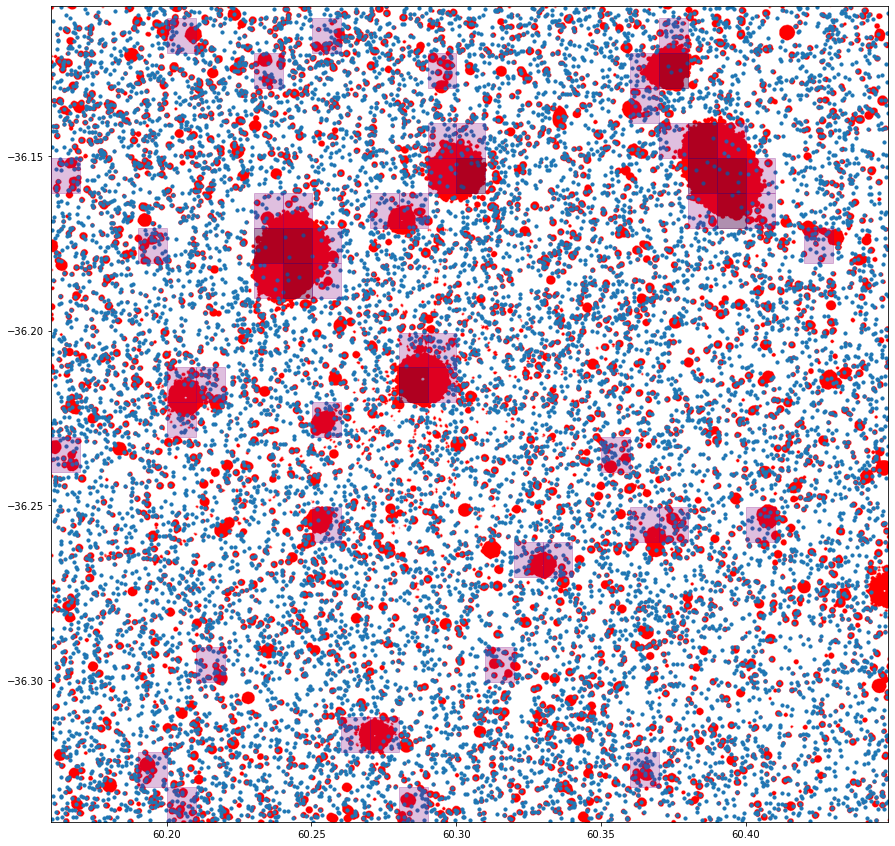

In [53]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.scatter(cols_scaled, rows_scaled, s=.5, alpha = .1, color = 'red')
plt.scatter(gal['ra'], gal['dec'], s=10)
for i in range(len(ra_mask)):
    rectangle = plt.Rectangle((ra_mask[i]-0.5*cote_carré, dec_mask[i]-0.5*cote_carré), cote_carré, cote_carré, fill=True, color='black', alpha = .25,zorder=3)
    ax.add_patch(rectangle)
for i in range(len(ra_mask_v2)):
    rectangle = plt.Rectangle((ra_mask_v2[i]-0.5*cote_carré, dec_mask_v2[i]-0.5*cote_carré), cote_carré, cote_carré, fill=True, color='purple', alpha = .25,zorder=3)
    ax.add_patch(rectangle)
plt.xlim([min(ra),max(ra)])
plt.ylim([min(dec),max(dec)])

In [39]:
indices_inférieurs_à_la_moyenne_v2

(array([], dtype=int64), array([], dtype=int64))